## Loading Required Packages

In [21]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Loading the datasets

In [22]:
mpi_national = pd.read_csv('MPI_national.csv')
mpi_subnation = pd.read_csv('MPI_subnational.csv')
netflix = pd.read_csv('netflix_titles.csv')

## Determining the Dimensions of Poverty

### Which Country is having Highest Poverty in Urban Areas (Assuming MPI is used to measure Poverty index)

In [23]:
mpi_national = mpi_national.sort_values(by=['MPI Urban'],ascending=False)
mpi_national.head(1)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
101,SSD,South Sudan,0.459,82.5,55.7,0.591,94.0,62.8


#### South Sudan is having poverty in Urban Areas

### Which Country is having Highest and Lowest Population suffering from Poverty

####  Population details are not present in the datset provided. Had the population data would have been present, then based on countries having highest & lowest population could have easily extracted poverty 

### What is the Intensity of Deprivation in Asian Countries.

In [24]:
asian_countries = mpi_subnation[mpi_subnation['World region'].isin(['East Asia and the Pacific','South Asia','Europe and Central Asia'])]
asian_countries = asian_countries[['Country','Intensity of deprivation Regional']]
asian_countries = asian_countries.groupby('Country').mean()
asian_countries = asian_countries.reset_index()
asian_countries.sort_values(by=['Intensity of deprivation Regional'], inplace=True,ascending=False)

asian_countries.head() # Showing data for only top 6 countries. But extracted for all

,Country,Intensity of deprivation Regional
13,Timor-Leste,52.300000
0,Afghanistan,51.908824
10,Pakistan,50.766667
6,Lao People's Democratic Republic,49.105882
11,Philippines,47.547059


### Which 10 Countries are the Poorest Countries

In [25]:
mpi_subnation = mpi_subnation.sort_values(by=['MPI Regional'],ascending=False)
poorest_countries = mpi_subnation[['Country','MPI National']]
poorest_countries = poorest_countries.groupby('Country').mean()
poorest_countries = poorest_countries.reset_index()
poorest_countries.sort_values(by=['MPI National'], inplace=True,ascending=False)

poorest_countries.head(10) # Showing data for only top 10 countries. But extracted for all

,Country,MPI National
53,Niger,0.605
24,Ethiopia,0.564
62,South Sudan,0.557
12,Chad,0.552
7,Burkina Faso,0.535
61,Sierra Leone,0.464
29,Guinea,0.459
44,Mali,0.457
8,Burundi,0.454
11,Central African Republic,0.430


###  Which Countries’ Rural Population is having highest Poverty Index in the World

In [26]:
mpi_national = mpi_national.sort_values(by=['MPI Rural'],ascending=False)
mpi_national.head(1)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
96,NER,Niger,0.276,53.9,51.2,0.669,96.19,69.5


#### Niger is having highest poverty index is rural population (0.669)

### Analyzing Poverty in Afghanistan

In [27]:
mpi_subnation = mpi_subnation.reset_index()
del mpi_subnation['index']
afg = mpi_subnation[mpi_subnation['ISO country code']=='AFG']

In [28]:
#MPI Regional of Afganistan
afg_mpi_reg = afg[['Sub-national region','MPI Regional']]
afg_mpi_reg. head()

,Sub-national region,MPI Regional
25,Urozgan,0.624
27,Nooristan,0.611
126,Badghis,0.466
150,Kandahar,0.437
201,Badakhshan,0.387


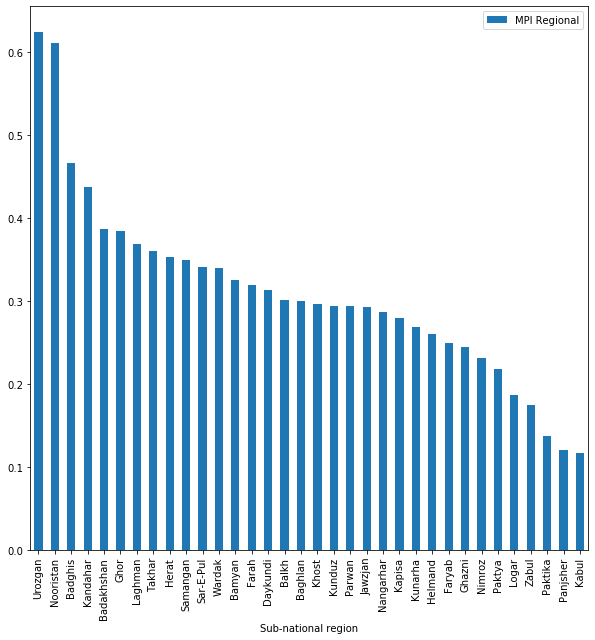

In [29]:
afg_mpi_reg.plot(x="Sub-national region", y='MPI Regional', kind="bar",figsize=(10,10))

In [30]:
#Head Count Ratio Regional of Afganistan
afg_head_ratio = afg[['Sub-national region','Headcount Ratio Regional']]
afg_head_ratio.head()

,Sub-national region,Headcount Ratio Regional
25,Urozgan,94.5
27,Nooristan,93.7
126,Badghis,79.3
150,Kandahar,72.1
201,Badakhshan,67.5


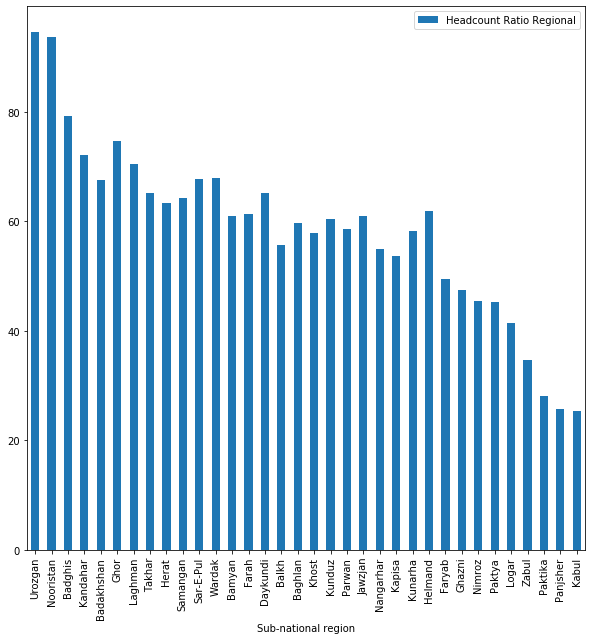

In [31]:
afg_head_ratio.plot(x="Sub-national region", y='Headcount Ratio Regional', kind="bar",figsize=(10,10))

### What is the Difference between India and Afghanistan in terms of Poverty Index.

In [32]:
afg = mpi_national[mpi_national['ISO']=='AFG']
ind = mpi_national[mpi_national['ISO']=='IND']

In [19]:
#### MPI Urban of India - 0.064
#### MPI Urban of Afganistan - 0.132

#### Headcount Ratio Urban of India - 14.8
#### Headcount Ratio Urban of Afganistan - 25.8

#### Intensity of Deprivation Urban of India - 43.3
#### Intensity of Deprivation Urban of Afganistan - 45.8

#### MPI Rural of India - 0.25
#### MPI Rural of Afganistan - 0.347

#### Headcount Ratio Rural of India - 53.49
#### Headcount Ratio Rural of Afganistan - 64.66

#### Intensity of Deprivation Rural of India - 46.7
#### Intensity of Deprivation Rural of Afganistan - 53.6